In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
plt.style.use('seaborn-paper')
import seaborn as sns
import joblib
import joypy
# plt.rcParams['font.family']='Times New Roman,Microsoft YaHei'# 设置字体族，中文为微软雅黑，英文为Times New Roman
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

C:\Users\aa271\AppData\Local\Temp\ipykernel_26904\731360150.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


In [2]:
datajh=pd.read_csv("groupedjhS.csv")
datacm=pd.read_csv("groupedcmS.csv")

In [23]:
soa=list(datajh.columns[datajh.columns.get_loc("0.25um"):datajh.columns.get_loc("32.00um")])
datasoa=datajh.groupby("Hour_Min").mean().reset_index()[soa]
datasoa.columns= [item.replace("um",'')  for item in soa]
datasoa["Hour"]=datajh.groupby("Hour_Min").mean().reset_index()["Hour"]
long_data = datasoa.melt(id_vars='Hour', var_name='Particle Size', value_name='Concentration')

C:\Users\aa271\AppData\Local\Temp\ipykernel_29212\2630537102.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datasoa=datajh.groupby("Hour_Min").mean().reset_index()[soa]
C:\Users\aa271\AppData\Local\Temp\ipykernel_29212\2630537102.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datasoa["Hour"]=datajh.groupby("Hour_Min").mean().reset_index()["Hour"]


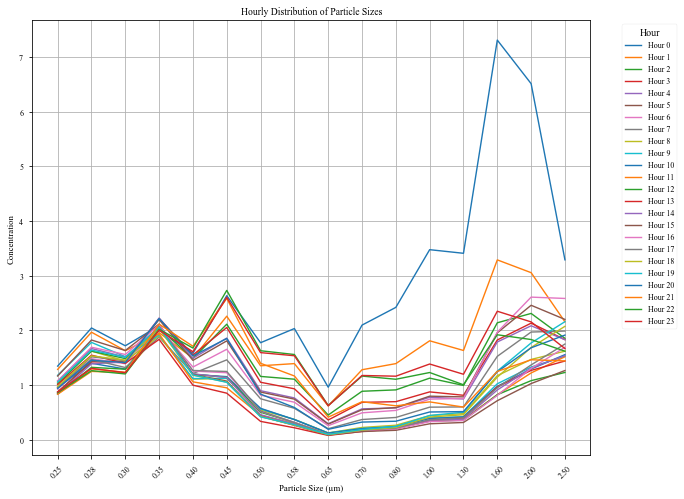

In [26]:
# Set a larger figure size for better visualization
plt.figure(figsize=(10, 8))


data = long_data.copy()
# Plotting the distribution of particle sizes for each hour
for hour in data['Hour'].unique():
    datalong=long_data[(long_data['Hour'] == hour)*(long_data['Particle Size'].astype("double") <= 2.5)].groupby("Particle Size").mean().reset_index()

    sns.lineplot(x=datalong["Particle Size"],y=datalong.Concentration, label=f'Hour {int(hour)}')

plt.xlabel('Particle Size (µm)')
plt.ylabel('Concentration')
plt.title('Hourly Distribution of Particle Sizes')
plt.legend(title='Hour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

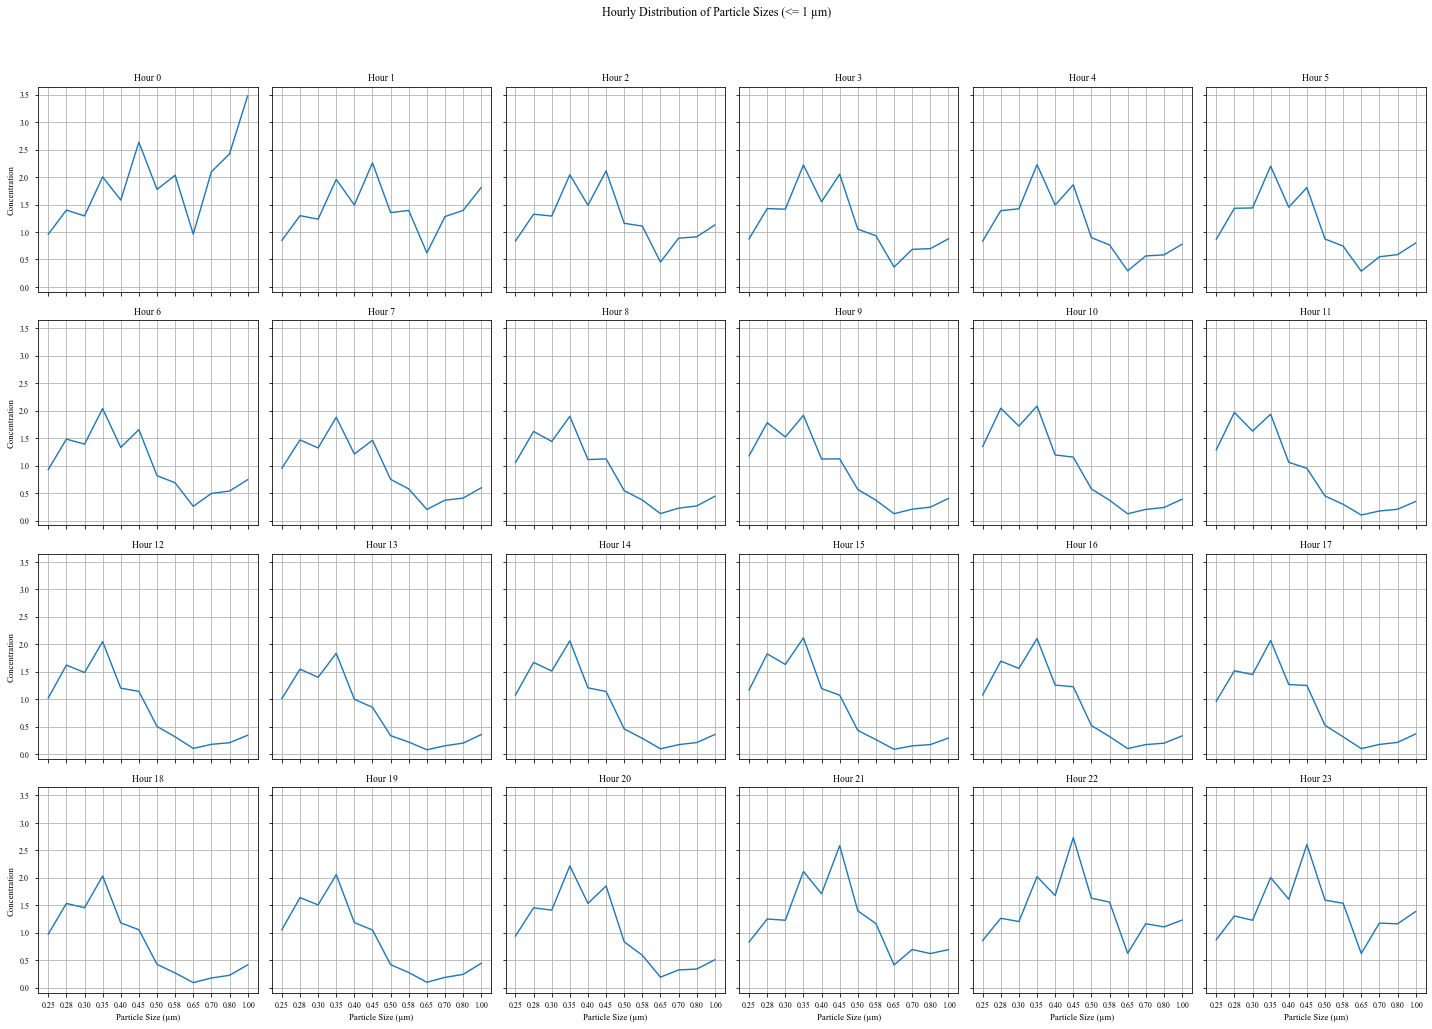

In [44]:

# Plotting the distribution of particle sizes for each hour
# Set up a 4x6 grid of subplots
fig, axes = plt.subplots(4, 6, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle('Hourly Distribution of Particle Sizes (<= 1 µm)')

# Plotting each hour in a separate subplot
for i, hour in enumerate(sorted(long_data['Hour'].unique())):
    ax = axes[i // 6, i % 6]

    # Filtering data for each hour and particle sizes <= 1 µm
    datalong = long_data[(long_data['Hour'] == hour) & (long_data['Particle Size'].astype(float) <= 1)]
    datalong = datalong.groupby("Particle Size").mean().reset_index()

    sns.lineplot(x=datalong["Particle Size"], y=datalong.Concentration, ax=ax)
    ax.set_title(f'Hour {int(hour)}')
    ax.set_xlabel('Particle Size (µm)')
    ax.set_ylabel('Concentration')
    ax.grid(True)

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [89]:
long_data[(long_data['Hour'] == 10)*(long_data['Particle Size'].astype("double") <= 1)].groupby("Particle Size").mean()['Concentration'].sum()

11.746414737654321

In [90]:
data = datajh.groupby(["Hour_Min"]).mean().reset_index()
data[data.Hour==10]["PM1"].mean()

C:\Users\aa271\AppData\Local\Temp\ipykernel_21512\1588704155.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh.groupby(["Hour_Min"]).mean().reset_index()


17.97899691358025

<Figure size 864x576 with 0 Axes>

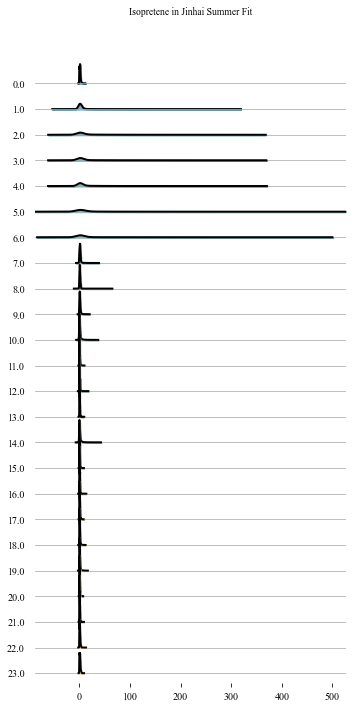

In [69]:


# Plotting
plt.figure(figsize=(12, 8))
fig, axes = joypy.joyplot(data=long_data,
    by='Hour',
    column='Concentration', range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer Fit",
                          colormap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True), ylabels= "Concentration")
plt.show()

In [120]:
# Plotting
plt.figure(figsize=(12, 8))
fig, axes = joypy.joyplot(data=datasoa,
    by='Hour',
    column='0.20', range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer Fit",
                          colormap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True), ylabels= "Concentration")
plt.show()

KeyError: "None of [Index(['0.20'], dtype='object')] are in the [columns]"

<Figure size 864x576 with 0 Axes>

In [4]:
datajh

,Time,甲硫醇浓度,"1,3-丁二烯浓度",丁烯浓度,丙酮、丁烷浓度,正丙醇浓度,甲硫醚、乙硫醇浓度,氯乙烷浓度,异戊二烯浓度,戊烯浓度,...,地面层湿度,TVOCs,Hour_Min_Sec,Hour_Min,Hour,Month,Day,Season,Datetime,seconds
0,2022-08-05 11:25:46,0.000,0.000,0.0,1.000,0.00,1.000,0.00,0.0,1.5,...,52.900000,45.350,11:25:46,11:25,11,Aug,5,Summer,2022-08-05 11:25:46,41146
1,2022-08-05 11:25:53,0.000,0.000,0.0,1.000,0.00,0.000,0.00,0.0,3.0,...,52.900000,56.900,11:25:53,11:25,11,Aug,5,Summer,2022-08-05 11:25:53,41153
2,2022-08-05 11:26:00,0.000,0.000,0.0,1.000,1.45,0.000,0.00,1.0,1.0,...,52.900000,52.650,11:26:00,11:26,11,Aug,5,Summer,2022-08-05 11:26:00,41160
3,2022-08-05 11:26:07,0.000,0.000,0.0,1.000,0.00,0.000,0.00,8.0,2.0,...,52.900000,71.300,11:26:07,11:26,11,Aug,5,Summer,2022-08-05 11:26:07,41167
4,2022-08-05 11:26:14,0.000,0.000,0.0,1.000,1.90,0.000,0.20,0.0,0.0,...,52.900000,57.900,11:26:14,11:26,11,Aug,5,Summer,2022-08-05 11:26:14,41174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149913,2023-07-26 14:28:43,0.620,0.550,0.0,1.530,0.22,0.590,0.50,0.0,0.0,...,77.397778,26.780,14:28:43,14:28,14,Jul,26,Summer,2023-07-26 14:28:43,52123
149914,2023-07-26 14:28:50,0.620,0.480,0.0,1.280,0.22,0.590,0.25,0.0,0.0,...,77.398889,23.000,14:28:50,14:28,14,Jul,26,Summer,2023-07-26 14:28:50,52130
149915,2023-07-26 14:28:57,0.125,0.320,0.0,1.160,0.31,0.435,0.00,0.0,0.0,...,77.400000,26.150,14:28:57,14:28,14,Jul,26,Summer,2023-07-26 14:28:57,52137
149916,2023-07-26 14:29:04,0.000,0.390,0.0,1.050,0.70,0.610,0.00,0.0,0.0,...,77.448750,32.610,14:29:04,14:29,14,Jul,26,Summer,2023-07-26 14:29:04,52144


C:\Users\aa271\AppData\Local\Temp\ipykernel_18056\3317190700.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh[datajh.Month=="Aug"].groupby(["Hour_Min"]).mean().reset_index()


<Figure size 864x576 with 0 Axes>

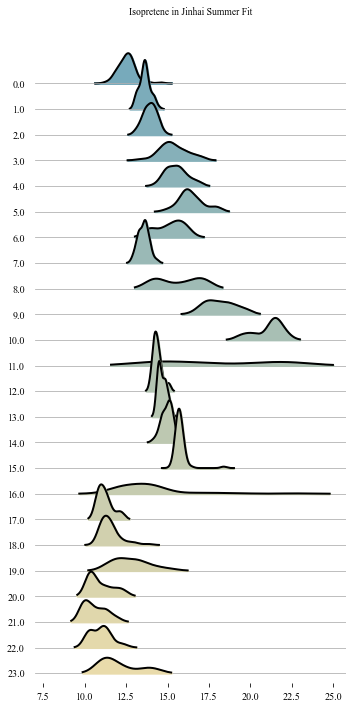

In [31]:
data = datajh[datajh.Month=="Aug"].groupby(["Hour_Min"]).mean().reset_index()
# Plotting
plt.figure(figsize=(12, 8))
fig, axes = joypy.joyplot(data=data,
    by='Hour',
    column='PM1', range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer Fit",
                          colormap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True), ylabels= "Concentration")
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_28740\2751962205.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh.groupby(["Hour_Min"]).mean().reset_index()


<Figure size 864x576 with 0 Axes>

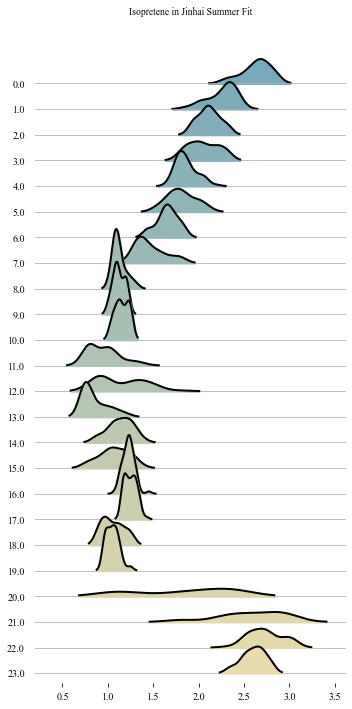

In [6]:
data = datajh.groupby(["Hour_Min"]).mean().reset_index()
# Plotting
plt.figure(figsize=(12, 8))
fig, axes = joypy.joyplot(data=data,
    by='Hour',
    column='0.45um', range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer Fit",
                          colormap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True), ylabels= "Concentration")
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_22944\2767944540.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh.groupby(["Hour_Min"]).mean().reset_index()


<Figure size 864x576 with 0 Axes>

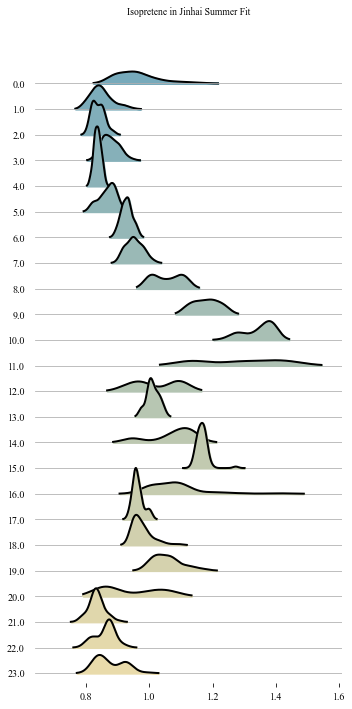

In [5]:
data = datajh.groupby(["Hour_Min"]).mean().reset_index()
# Plotting
plt.figure(figsize=(12, 8))
fig, axes = joypy.joyplot(data=data,
    by='Hour',
    column='0.25um', range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer Fit",
                          colormap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True), ylabels= "Concentration")
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_18056\4009397615.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datacm[datacm.Month=="Jul"].groupby(["Hour_Min"]).mean().reset_index()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\joypy\joyplot.py:286: UserWarning: The data contains a group with a single distinct value (0.0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "


<Figure size 864x576 with 0 Axes>

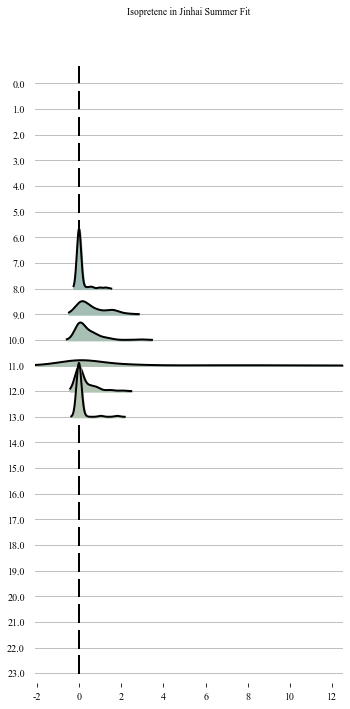

In [22]:
data = datacm[datacm.Month=="Jul"].groupby(["Hour_Min"]).mean().reset_index()
# Plotting
plt.figure(figsize=(12, 8))
fig, axes = joypy.joyplot(data=data,
    by='Hour',
    column='异戊二烯浓度', range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer Fit",
                          colormap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True), ylabels= "Concentration")
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_26904\763228582.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh.groupby(["Hour_Min"]).mean().reset_index()


<Figure size 864x576 with 0 Axes>

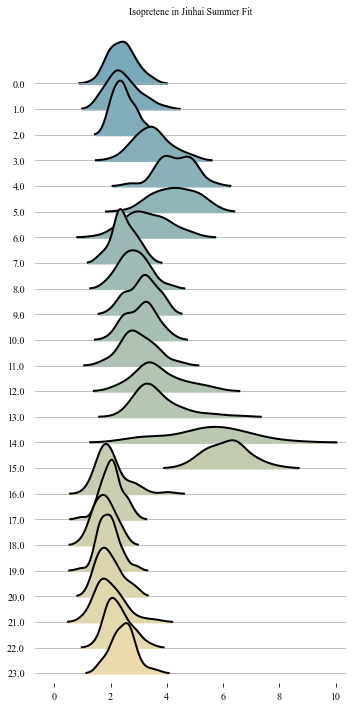

In [4]:
data = datajh.groupby(["Hour_Min"]).mean().reset_index()
data["BVOCs"]=data['异戊二烯浓度']+data["1,3-丁二烯浓度"]+data["戊烯浓度"]+data["丁烯浓度"]
# Plotting
plt.figure(figsize=(12, 8))
fig, axes = joypy.joyplot(data=data,
    by='Hour',
    column='BVOCs', range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer Fit",
                          colormap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True), ylabels= "Concentration")
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_18056\1514831435.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh.groupby(["Hour_Min"]).mean().reset_index()


<Figure size 864x576 with 0 Axes>

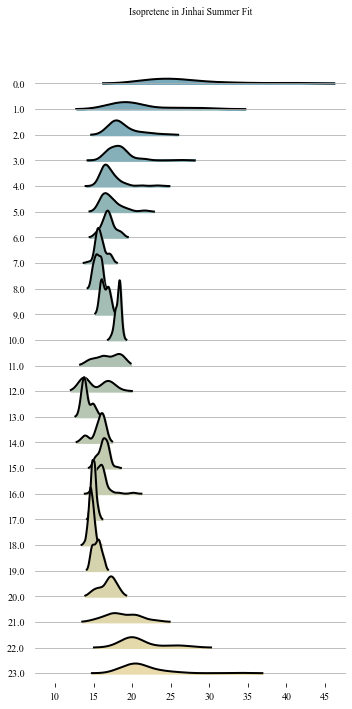

In [33]:
data = datajh.groupby(["Hour_Min"]).mean().reset_index()
# Plotting
plt.figure(figsize=(12, 8))
fig, axes = joypy.joyplot(data=data,
    by='Hour',
    column='PM1', range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer Fit",
                          colormap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True), ylabels= "Concentration")
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_18056\432779919.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datacm.groupby(["Hour_Min"]).mean().reset_index()


<Figure size 864x576 with 0 Axes>

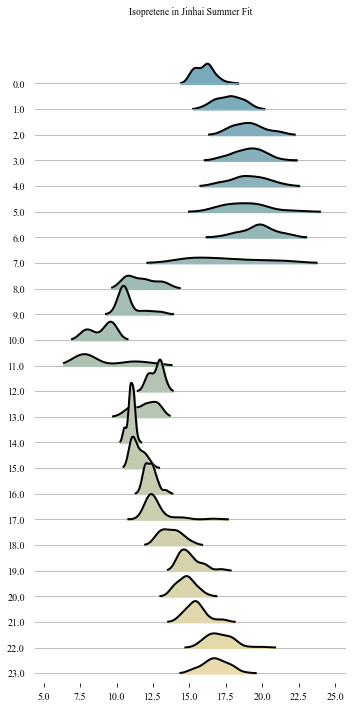

In [34]:
data = datacm.groupby(["Hour_Min"]).mean().reset_index()
# Plotti
plt.figure(figsize=(12, 8))
fig, axes = joypy.joyplot(data=data,
    by='Hour',
    column='PM1', range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer Fit",
                          colormap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True), ylabels= "Concentration")
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_18056\2987849791.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh.groupby(["Hour_Min"]).mean().reset_index()


<AxesSubplot: xlabel='风速', ylabel='PM1'>

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


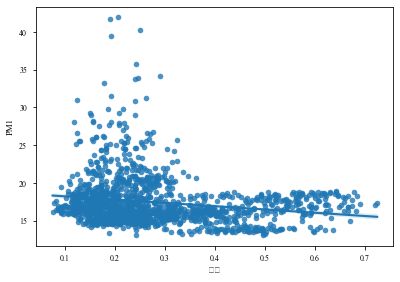

In [37]:
data = datajh.groupby(["Hour_Min"]).mean().reset_index()
sns.regplot(x=data.风速,y=data.PM1)

<AxesSubplot: xlabel='地面层温度', ylabel='PM1'>

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fu

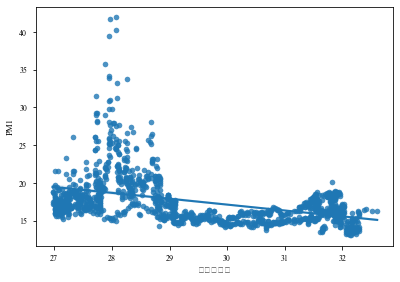

In [43]:
sns.regplot(x=data.地面层温度,y=data.PM1)

C:\Users\aa271\AppData\Local\Temp\ipykernel_18056\1016925350.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh.groupby(["Hour_Min"]).mean().reset_index()


<AxesSubplot: xlabel='PM1', ylabel='Density'>

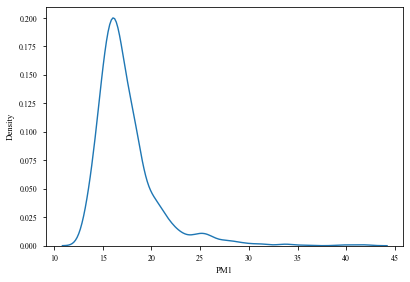

In [42]:
data = datajh.groupby(["Hour_Min"]).mean().reset_index()
sns.kdeplot(data.PM1)

C:\Users\aa271\AppData\Local\Temp\ipykernel_21512\853323265.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh.groupby(["Hour_Min"]).mean().reset_index()


<Figure size 864x576 with 0 Axes>

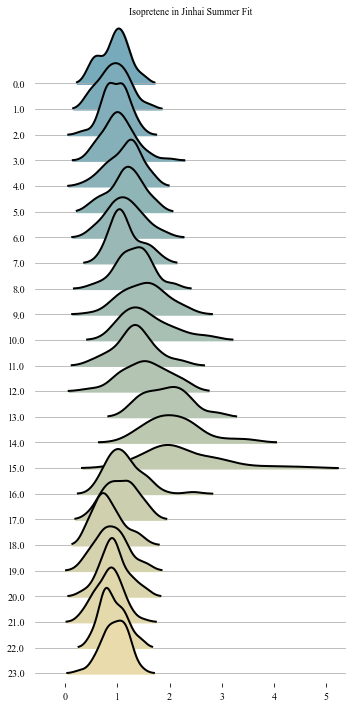

In [96]:
data = datajh.groupby(["Hour_Min"]).mean().reset_index()
# Plotting
plt.figure(figsize=(12, 8))
fig, axes = joypy.joyplot(data=data,
    by='Hour',
    column='异戊二烯浓度', range_style='own',
                          grid="y", linewidth=2, legend=False, figsize=(5,10),
                          title="Isopretene in Jinhai Summer Fit",
                          colormap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True), ylabels= "Concentration")
plt.show()

In [14]:
data = datajh.groupby(["Hour_Min"]).mean().reset_index()

C:\Users\aa271\AppData\Local\Temp\ipykernel_25480\972425003.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh.groupby(["Hour_Min"]).mean().reset_index()


<AxesSubplot: xlabel='PM1', ylabel='Density'>

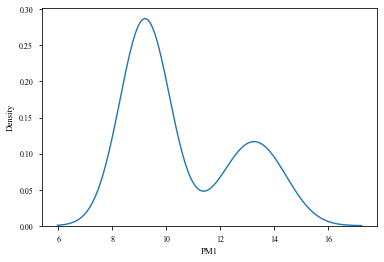

In [105]:
sns.kdeplot(data[data.Hour==11]["PM1"])

<AxesSubplot: xlabel='PM1', ylabel='Density'>

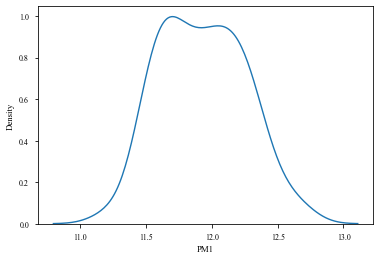

In [106]:
sns.kdeplot(data[data.Hour==15]["PM1"])

<AxesSubplot: xlabel='PM1', ylabel='Density'>

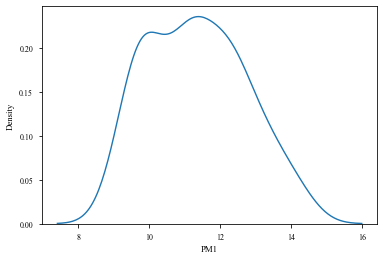

In [15]:
sns.kdeplot(data[data.Hour==13]["PM1"])

<AxesSubplot: xlabel='PM1', ylabel='Density'>

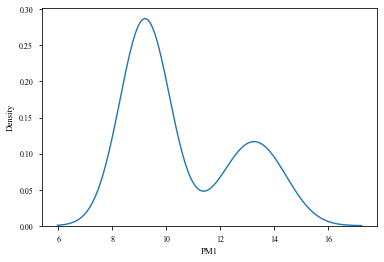

In [16]:
sns.kdeplot(data[data.Hour==11]["PM1"])

<AxesSubplot: xlabel='PM1', ylabel='Density'>

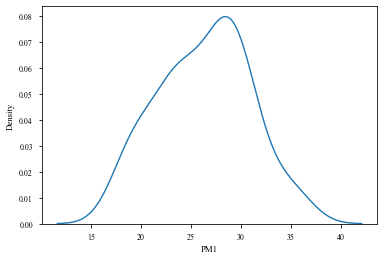

In [109]:
sns.kdeplot(data[data.Hour==2]["PM1"])

<AxesSubplot: xlabel='PM1', ylabel='Density'>

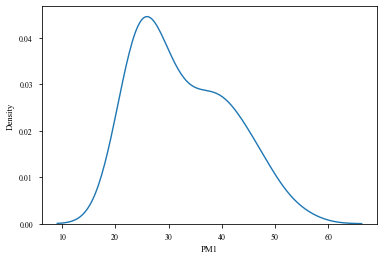

In [110]:
sns.kdeplot(data[data.Hour==5]["PM1"])

In [122]:
soa

['0.25um',
 '0.28um',
 '0.30um',
 '0.35um',
 '0.40um',
 '0.45um',
 '0.50um',
 '0.58um',
 '0.65um',
 '0.70um',
 '0.80um',
 '1.00um',
 '1.30um',
 '1.60um',
 '2.00um',
 '2.50um',
 '3.00um',
 '3.50um',
 '4.00um',
 '5.00um',
 '6.50um',
 '7.50um',
 '8.50um',
 '10.00um',
 '12.50um',
 '15.00um',
 '17.50um',
 '20.00um',
 '25.00um',
 '30.00um']

C:\Users\aa271\AppData\Local\Temp\ipykernel_21512\1844046682.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh.groupby(["Hour_Min"]).mean().reset_index().groupby(["Hour"]).mean()
C:\Users\aa271\AppData\Local\Temp\ipykernel_21512\1844046682.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = datajh.groupby(["Hour_Min"]).mean().reset_index().groupby(["Hour"]).mean()


<AxesSubplot: xlabel='地面层温度', ylabel='1.00um'>

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fu

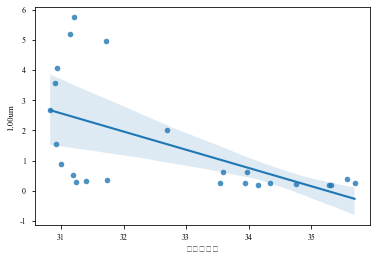

In [138]:
data = datajh.groupby(["Hour_Min"]).mean().reset_index().groupby(["Hour"]).mean()
sns.regplot(y=data["1.00um"],x=data["地面层温度"])

<AxesSubplot: xlabel='地面层温度', ylabel='0.30um'>

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fu

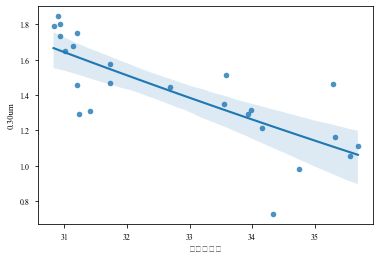

In [140]:
sns.regplot(y=data["0.30um"],x=data["地面层温度"])

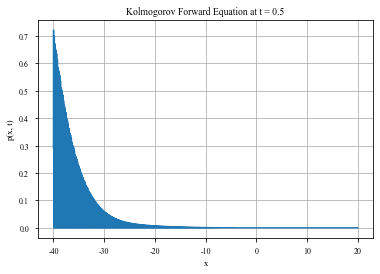

In [34]:
import scipy.sparse.linalg
import scipy.sparse as sp

def solve_fokker_planck_at_time(a, v, k, b, x_range, t_target, dx, dt):
    # 网格设置
    x = np.arange(x_range[0], x_range[1], dx)
    N = len(x)

    # 时间设置
    M = int(t_target / dt)

    # 系数矩阵构造
    diagonal = np.ones(N)
    lower = np.ones(N - 1)
    upper = np.ones(N - 1)

    # A矩阵用于第一导数项，B矩阵用于第二导数项
    A = sp.diags([lower, -lower], [-1, 1], shape=(N, N)) / (2 * dx)
    B = sp.diags([upper, -2 * diagonal, diagonal], [-1, 0, 1], shape=(N, N)) / (dx**2)

    # 初始条件（高斯分布）
    p = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
    p = p / np.sum(p * dx)  # 归一化

    # 时间演化
    for t in range(M):
        time = t * dt
        drift = (a * time + v) * A
        diffusion = 0.5 * (k * time + b)**2 * B
        L = sp.eye(N) - dt * (drift - diffusion)
        p = scipy.sparse.linalg.spsolve(L, p)

        # 归一化
        p = np.maximum(p, 0)
        p = p / np.sum(p * dx)

    return x, p

# 参数
a, v, k, b = 0.1, 0.2, 2, 0.1
x_range = [-40, 20]  # x的范围
t_target = 0.5       # 目标时间
dx = 0.01            # 空间步长（更小以提高精度）
dt = 0.001           # 时间步长（更小以提高精度）

# 求解并绘图
x, p = solve_fokker_planck_at_time(a, v, k, b, x_range, t_target, dx, dt)
plt.plot(x, p)
plt.xlabel('x')
plt.ylabel('p(x, t)')
plt.title(f'Kolmogorov Forward Equation at t = {t_target}')
plt.grid(True)
plt.show()

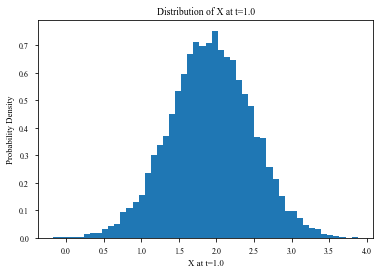

In [45]:
# 参数设置
a, v, k, b = 5, -0.5, 0.3, 0.4   # 漂移和扩散系数
t_final = 1.0                      # 目标时间
dt = 0.01                          # 时间步长
n_paths = 10000                    # 模拟路径数

# 时间网格
t = np.arange(0, t_final, dt)
n_steps = len(t)

# 模拟多个路径
X_paths = np.zeros((n_paths, n_steps))
for i in range(n_paths):
    W = np.random.normal(0, np.sqrt(dt), n_steps)  # 维纳过程增量
    X = np.zeros(n_steps)
    for j in range(1, n_steps):
        X[j] = X[j-1] + (a * t[j-1] + v) * dt + (k * t[j-1] + b) * W[j]
    X_paths[i] = X

# 收集并绘制在目标时间的分布
X_distribution = X_paths[:, -1]
plt.hist(X_distribution, bins=50, density=True)
plt.xlabel('X at t=' + str(t_final))
plt.ylabel('Probability Density')
plt.title('Distribution of X at t=' + str(t_final))
plt.show()

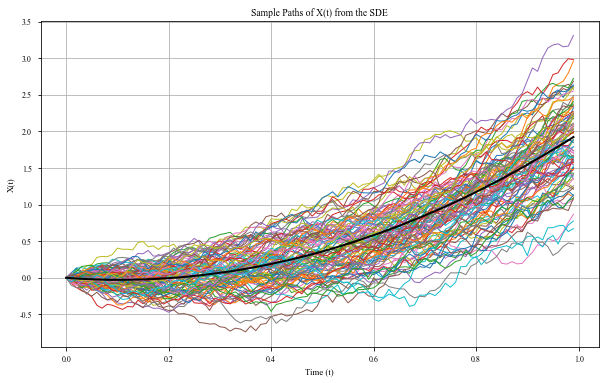

In [46]:
# 绘制一些路径的X关于t的图像
plt.figure(figsize=(10, 6))
for i in range(100):  # 只绘制部分路径
    plt.plot(t, X_paths[i], lw=1)

mean_X = np.mean(X_paths, axis=0)
plt.plot(t, mean_X, color='black', lw=2, label='Mean Trend of X(t)')
plt.xlabel('Time (t)')
plt.ylabel('X(t)')
plt.title('Sample Paths of X(t) from the SDE')
plt.grid(True)

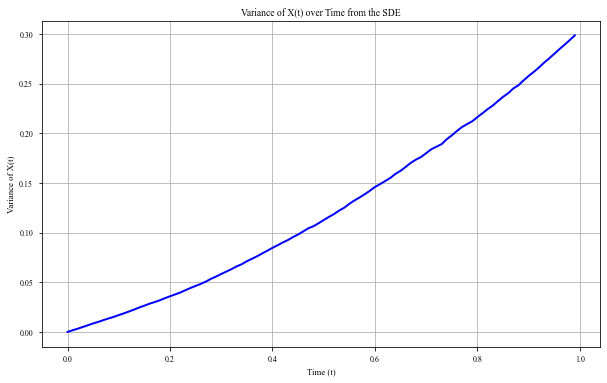

In [47]:
# 计算所有路径的方差
variance_X = np.var(X_paths, axis=0)

# 绘制方差随时间的变化
plt.figure(figsize=(10, 6))
plt.plot(t, variance_X, color='blue', lw=2)

plt.xlabel('Time (t)')
plt.ylabel('Variance of X(t)')
plt.title('Variance of X(t) over Time from the SDE')
plt.grid(True)
plt.show()

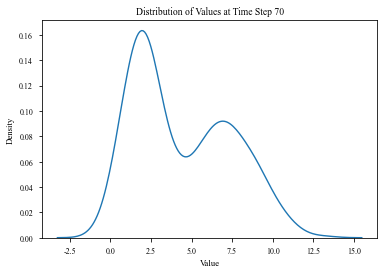

In [53]:
def simulate_markov_process_at_specific_time(transition_matrix, initial_state, time_step, normal_params, num_simulations):
    """
    Simulate a Markov process N times and record the value at a specific time step.
    """
    values_at_time_step = []

    for _ in range(num_simulations):
        state = initial_state
        for step in range(time_step + 1):
            if state == 0:
                value = 0
            else:
                mean, std = normal_params[state - 1]
                value = np.random.normal(mean, std)
            if step == time_step:
                values_at_time_step.append(value)
            state = np.random.choice(len(transition_matrix), p=transition_matrix[state])

    return values_at_time_step

# Transition matrix for the Markov process
transition_matrix = [
    [0.01, 0.49, 0.5],  # Probabilities from state 0
    [0.01, 0.5, 0.49],    # Probabilities from state t1
    [0.01, 0.45, 0.54]   # Probabilities from state t2
]


# Normal distribution parameters for states 1 and 2
normal_params = [(2, 1), (7, 2)]  # (mean, std) for each state

# Initial state (starting from state 0)
initial_state = 0

# Number of simulations and specific time step to record
num_simulations = 1000
specific_time_step = 70

# Simulate the Markov process N times and record the value at a specific time step
values_at_specific_time = simulate_markov_process_at_specific_time(
    transition_matrix, initial_state, specific_time_step, normal_params, num_simulations)

# Plot the distribution of values at the specific time step
sns.kdeplot(values_at_specific_time)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title(f"Distribution of Values at Time Step {specific_time_step}")
plt.show()


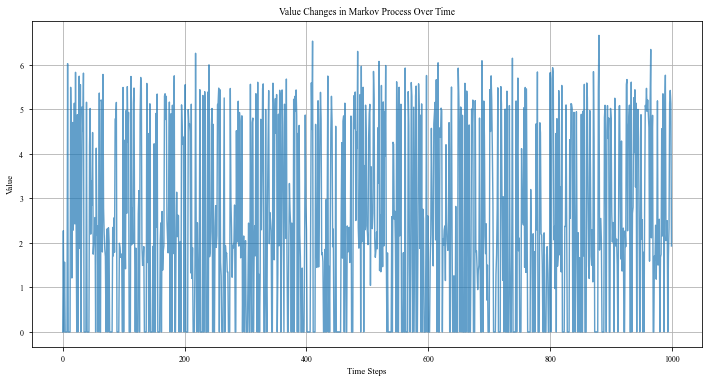

In [47]:
def simulate_markov_process_with_normal_distribution(transition_matrix, initial_state, steps, normal_params):
    """
    Simulate a Markov process where certain states correspond to normal distributions.
    """
    state = initial_state
    values = []

    for _ in range(steps):
        if state > 0:
            # Generate a value from the normal distribution corresponding to the current state
            mean, std = normal_params[state - 1]
            value = np.random.normal(mean, std)
        else:
            # State 0 corresponds to a value of 0
            value = 0

        values.append(value)
        # Transition to the next state
        state = np.random.choice(len(transition_matrix), p=transition_matrix[state])

    return values

# Normal distribution parameters for states 1 and 2
normal_params = [(5, 0.5), (2, 0.5)]  # (mean, std) for each state

# Number of simulations
num_simulations = 1

# Simulate the Markov process with normal distributions for states 1 and 2
plt.figure(figsize=(12, 6))
for _ in range(num_simulations):
    values = simulate_markov_process_with_normal_distribution(transition_matrix, initial_state, steps, normal_params)
    plt.plot(values, alpha=0.7)

plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Value Changes in Markov Process Over Time")
plt.grid(True)
plt.show()

In [5]:
dataj=pd.DataFrame()
datare=datajh.groupby(["Hour_Min"]).mean().reset_index()

# dataj["BVOC"]=datare.异戊二烯浓度
dataj["BVOC"]=datare['异戊二烯浓度']+datare["1,3-丁二烯浓度"]+datare["戊烯浓度"]+datare["丁烯浓度"]
dataj["T"]=datare["地面层温度"]
dataj["hv"]=datare["地面层净辐射"]
dataj["RH"]=datare["地面层湿度"]
dataj["O3"]=datare.O3
dataj["NOx"]=datare.NOx
dataj["SO2"]=datare.SO2
# dataj["SOA"]=datare.PM1
# dataj["SOA"]=datare["0.25um"]
dataj["SOA"]=0
for i in datare.columns[(datare.columns.get_loc("0.25um")):(datare.columns.get_loc("0.28um"))]:
    dataj["SOA"]=dataj["SOA"]+datare[i]



dataj["HNO3"]=dataj["RH"]*dataj["NOx"]
dataj["H2SO4"]=dataj["RH"]*dataj["SO2"]
dataj["H2SO403"]=dataj["RH"]*dataj["SO2"]*dataj["O3"]
dataj["HNO3O3"]=dataj["RH"]*dataj["NOx"]*dataj["O3"]
dataj["O3"]=dataj["O3"]*dataj["hv"]
dataj["hv"]=dataj["hv"]



C:\Users\aa271\AppData\Local\Temp\ipykernel_26904\1778398699.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datare=datajh.groupby(["Hour_Min"]).mean().reset_index()


<AxesSubplot: xlabel='T', ylabel='SOA'>

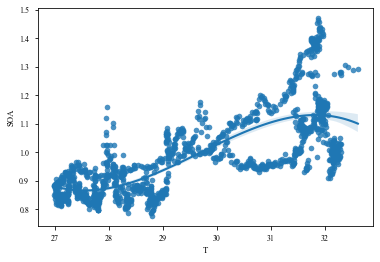

In [73]:
sns.regplot(x=dataj["T"],y=dataj.SOA,order=3)

<AxesSubplot: xlabel='BVOC', ylabel='SOA'>

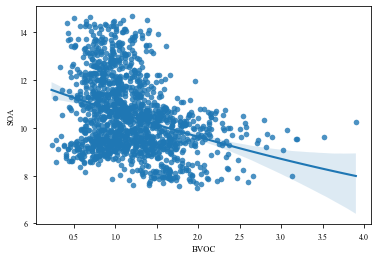

In [69]:
sns.regplot(y=dataj.SOA,x=dataj.BVOC,order=2)

<AxesSubplot: xlabel='T', ylabel='BVOC'>

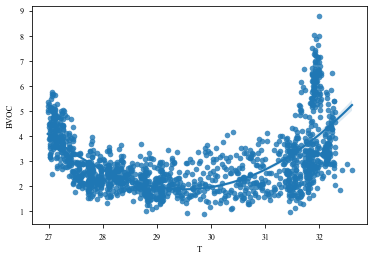

In [9]:
sns.regplot(x=dataj["T"],y=dataj.BVOC,order=2)

In [11]:
datajh.groupby(["Hour_Min"]).mean().reset_index()

C:\Users\aa271\AppData\Local\Temp\ipykernel_16460\803222134.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datajh.groupby(["Hour_Min"]).mean().reset_index()


,Hour_Min,TVOC浓度,甲硫醇浓度,"1,3-丁二烯浓度",丁烯浓度,丙酮、丁烷浓度,正丙醇浓度,甲硫醚、乙硫醇浓度,氯乙烷浓度,异戊二烯浓度,...,O3,NO2.1,负氧离子,地面层净辐射,地面层温度,地面层湿度,风速,Hour,Day,seconds
0,00:00,34.519028,0.236528,0.873333,0.037778,1.228750,0.427778,0.480278,0.250278,1.607917,...,3.789528,8.770250,904.250000,-0.369806,28.103611,86.202779,0.234556,0.0,19.5,29.0
1,00:01,35.234375,0.272500,0.931875,0.453906,1.201094,0.328750,0.389688,0.336719,1.317031,...,3.821859,8.759641,736.062500,-0.360797,28.102500,86.210940,0.264391,0.0,19.5,88.5
2,00:02,33.525417,0.273750,0.820972,0.000000,1.064861,0.361528,0.519444,0.216806,0.834167,...,4.144111,8.671139,530.250000,-0.343750,28.106667,86.200002,0.239583,0.0,19.5,148.0
3,00:03,33.340556,0.169028,0.616528,0.490417,1.144444,0.303472,0.698750,0.253056,1.050694,...,4.696694,8.473806,538.583333,-0.328222,28.116944,86.241668,0.218806,0.0,19.5,211.0
4,00:04,32.492031,0.182188,0.639375,0.206250,0.964375,0.347500,0.329375,0.219531,1.111875,...,4.552047,8.402703,605.671875,-0.580625,28.121094,86.289062,0.234438,0.0,19.5,270.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,23:55,31.828611,0.241250,0.714167,0.135694,0.960139,0.415139,0.440278,0.213750,1.074444,...,4.097194,8.748278,829.250000,-0.365500,28.126389,85.819444,0.207472,23.0,18.5,86128.0
1436,23:56,32.252639,0.292361,0.738750,0.148333,0.843750,0.286389,0.389306,0.241528,0.809722,...,4.253778,8.960500,739.666667,-0.374222,28.127500,85.861111,0.210917,23.0,18.5,86191.0
1437,23:57,31.840156,0.085312,0.574688,0.104531,1.129531,0.491094,0.449375,0.267500,0.750938,...,4.125938,8.906500,728.000000,-0.379547,28.126094,85.906251,0.215516,23.0,18.5,86250.5
1438,23:58,36.123611,0.267917,0.758194,0.233333,0.933056,0.386806,0.423611,0.213056,1.051111,...,4.034056,8.809917,825.916667,-0.378250,28.125000,85.963891,0.228417,23.0,18.5,86310.0


In [6]:
import statsmodels.api as sm

# 将这些变量乘以 BVOC
variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3","hv"]
for var in variables_to_regress:
    dataj[var + "_BVOC"] = dataj[var] * dataj["BVOC"]

# 选择变量进行线性回归
X = dataj[[var + "_BVOC" for var in variables_to_regress]] # 自变量
Y = dataj["SOA"] # 因变量
X = sm.add_constant(X) # 添加常数项

# 进行线性回归
model = sm.OLS(Y, X).fit()

# 输出结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SOA   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     420.5
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          1.11e-311
Time:                        13:56:44   Log-Likelihood:                 1437.8
No. Observations:                1440   AIC:                            -2862.
Df Residuals:                    1433   BIC:                            -2825.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9739      0.008    124.971   

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


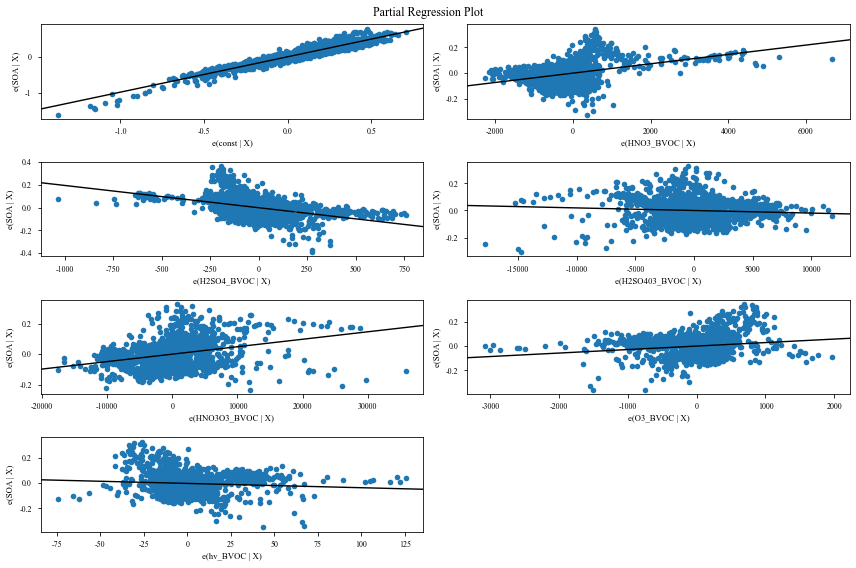

In [7]:
# 假设 model 是您已经拟合好的 statsmodels OLS 模型
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()

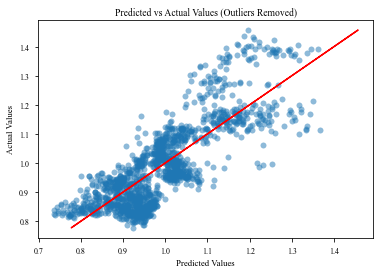

In [8]:

predictions=model.predict(X)
# 计算残差
residuals = Y - predictions

# 计算残差的标准差
std_dev = np.std(residuals)

# 定义离群值的阈值，例如，超过2个标准差
threshold = 3 * std_dev

# 过滤掉离群值
filtered_indices = np.abs(residuals) < threshold
filtered_predictions = predictions[filtered_indices]
filtered_actuals = Y[filtered_indices]

# 绘制过滤后的预测值与实际值
plt.scatter(filtered_predictions, filtered_actuals, alpha=0.5)
plt.plot(filtered_actuals, filtered_actuals, color='red') # 绘制 y = x 线表示理想情况

# 添加图形标题和轴标签
plt.title('Predicted vs Actual Values (Outliers Removed)')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# 显示图形
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_16460\1854521095.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(x=datare.groupby(["Hour"]).mean().reset_index().Hour,y=dataj.groupby(["Hour"]).mean().reset_index().SOA)


<AxesSubplot: xlabel='Hour', ylabel='SOA'>

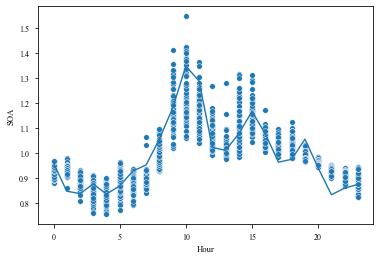

In [52]:
dataj["Hour"]=datare["Hour"]
dataj["predictions"]=predictions

sns.scatterplot(x=datare.Hour,y=predictions)
sns.lineplot(x=datare.groupby(["Hour"]).mean().reset_index().Hour,y=dataj.groupby(["Hour"]).mean().reset_index().SOA)

In [34]:
from hmmlearn import hmm
data=datajh.groupby(["Hour_Min"]).mean().reset_index()
data2=datajh.groupby(["Hour_Min"]).mean().groupby(["Hour"]).mean().reset_index()

C:\Users\aa271\AppData\Local\Temp\ipykernel_16460\31766976.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=datajh.groupby(["Hour_Min"]).mean().reset_index()
C:\Users\aa271\AppData\Local\Temp\ipykernel_16460\31766976.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2=datajh.groupby(["Hour_Min"]).mean().groupby(["Hour"]).mean().reset_index()


In [53]:
# 初始化一个空的DataFrame来存储结果
datahmm = pd.DataFrame(columns=['Hour', 'mu1', 'sigma1', 'mu2', 'sigma2',"P1","P2"])

for hour in range(25):  # 从0到24小时
    O_x = np.array(data[data.Hour == hour]["PM1"])
    if len(O_x) > 0:  # 确保数据非空
        Q = O_x.reshape(-1, 1)  # 重塑数据以适合模型
        model = hmm.GaussianHMM(
        n_components=2,
        n_iter=500000,
        covariance_type="diag",  # 尝试不同的协方差类型
        tol=0.001,               # 设置收敛容差
        startprob_prior=1.0,     # 调整开始概率的先验
        transmat_prior=1.0,      # 调整转移概率的先验
        algorithm="viterbi",     # 使用 Viterbi 算法
        random_state=42          # 设置随机数生成器的种子
        ).fit(Q)
        mus = np.ravel(model.means_)
        sigmas = np.ravel(np.sqrt([np.diag(c) for c in model.covars_]))
        P = model.transmat_


        # 确保mu1是较小的均值
        if mus[0] > mus[1]:
            mus = mus[::-1]
            sigmas = sigmas[::-1]
            P = P[:, [1, 0]][[1, 0]]  # 重新排序P的行和列以匹配mu的顺序

        # 将结果添加到DataFrame
        datahmm  = datahmm.append({
            'Hour': hour,
            'mu1': mus[0],
            'sigma1': sigmas[0],
            'mu2': mus[1],
            'sigma2': sigmas[1],
            'P1': P[0, 0],
            'P2': P[1, 1]
        }, ignore_index=True)


        # 预测状态
        states = model.predict(Q)
        # 将状态添加到原始数据的新列中
        data.loc[data.Hour == hour, 'state'] = states

# 确保 'state' 列是整数类型
data['state'] = data['state'].astype(int)

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aa271\AppData\Local\Temp\ipykernel_16460\927050101.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datahmm  = datahmm.append({
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aa271\AppData\Local\Temp\ipykernel_16460\927050101.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

In [36]:
data2['Hour'] = data2['Hour'].astype(int)
datahmm['Hour'] = datahmm['Hour'].astype(int)
datahmm = pd.merge(datahmm, data2[['Hour', '地面层温度']], on='Hour', how='left')
datahmm

,Hour,mu1,sigma1,mu2,sigma2,P1,P2,地面层温度
0,0,24.522333,2.366965,34.322080,4.896542,0.921725,0.733089,28.004897
1,1,18.788746,1.341574,25.248389,3.387931,0.945037,0.821644,27.776974
2,2,17.702368,0.658748,20.319883,1.646060,0.848512,0.738446,27.600055
3,3,17.924547,0.938403,21.595706,2.212678,0.978377,0.810637,27.315764
4,4,16.564097,0.501517,18.310858,1.627317,0.877244,0.723771,27.131946
5,5,16.599324,0.597653,18.593377,1.377570,0.921190,0.855139,27.032594
6,6,16.570842,0.584741,17.918044,0.562318,0.940121,0.802325,27.433132
7,7,15.534982,0.236616,16.304290,0.700135,0.962771,0.960893,28.687301
8,8,15.204786,0.294214,15.955449,0.182291,0.972426,1.000000,30.072972
9,9,16.135278,0.294433,17.028745,0.206241,0.974015,1.000000,31.037476


In [37]:
dataj=pd.DataFrame()
datare=data[data["state"]==0]
dataj["BVOC"]=datare.异戊二烯浓度
dataj["T"]=datare["地面层温度"]
dataj["hv"]=datare["地面层净辐射"]
dataj["RH"]=datare["地面层湿度"]
dataj["O3"]=datare.O3
dataj["NOx"]=datare.NOx
dataj["SO2"]=datare.SO2
dataj["SOA"]=datare.PM1


dataj["HNO3"]=dataj["RH"]*dataj["NOx"]
dataj["H2SO4"]=dataj["RH"]*dataj["SO2"]
dataj["H2SO403"]=dataj["RH"]*dataj["SO2"]*dataj["O3"]
dataj["HNO3O3"]=dataj["RH"]*dataj["NOx"]*dataj["O3"]
dataj["O3"]=dataj["O3"]*dataj["hv"]
dataj["hv"]=dataj["hv"]


# 将这些变量乘以 BVOC
variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3","hv"]
for var in variables_to_regress:
    dataj[var + "_BVOC"] = dataj[var] * dataj["BVOC"]

# 选择变量进行线性回归
X = dataj[[var + "_BVOC" for var in variables_to_regress]] # 自变量
Y = dataj["SOA"] # 因变量
X = sm.add_constant(X) # 添加常数项

# 进行线性回归
model = sm.OLS(Y, X).fit()

# 输出结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SOA   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     53.37
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           8.79e-56
Time:                        01:46:03   Log-Likelihood:                -2005.0
No. Observations:                 845   AIC:                             4024.
Df Residuals:                     838   BIC:                             4057.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           17.2541      0.303     56.998   

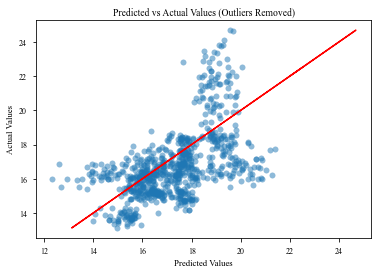

In [38]:
predictions=model.predict(X)
# 计算残差
residuals = Y - predictions

# 计算残差的标准差
std_dev = np.std(residuals)

# 定义离群值的阈值，例如，超过2个标准差
threshold = 2 * std_dev

# 过滤掉离群值
filtered_indices = np.abs(residuals) < threshold
filtered_predictions = predictions[filtered_indices]
filtered_actuals = Y[filtered_indices]

# 绘制过滤后的预测值与实际值
plt.scatter(filtered_predictions, filtered_actuals, alpha=0.5)
plt.plot(filtered_actuals, filtered_actuals, color='red') # 绘制 y = x 线表示理想情况

# 添加图形标题和轴标签
plt.title('Predicted vs Actual Values (Outliers Removed)')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# 显示图形
plt.show()

<AxesSubplot: xlabel='异戊二烯浓度', ylabel='PM1'>

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25098 (\N{CJK UNIFIED IDEOGRAPH-620A}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28911 (\N{CJK UNIFIED IDEOGRAPH-70EF}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 27987 (\N{CJK UNIFIED IDEOGRAPH-6D53}) missing from current font.
  fu

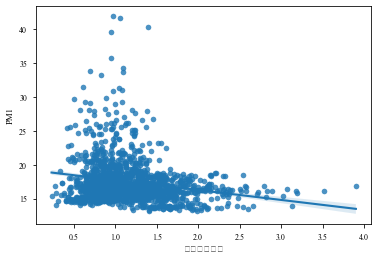

In [23]:
sns.regplot(x=data.异戊二烯浓度,y=data.PM1)

In [39]:
from hmmlearn import hmm
data=datacm.groupby(["Hour_Min"]).mean().reset_index()
data2=datacm.groupby(["Hour_Min"]).mean().groupby(["Hour"]).mean().reset_index()

# 初始化一个空的DataFrame来存储结果
datahmm = pd.DataFrame(columns=['Hour', 'mu1', 'sigma1', 'mu2', 'sigma2'])

for hour in range(25):  # 从0到24小时
    O_x = np.array(data[data.Hour == hour]["PM1"])
    if len(O_x) > 0:  # 确保数据非空
        Q = O_x.reshape(-1, 1)  # 重塑数据以适合模型
        model = hmm.GaussianHMM(n_components=2, n_iter=10000).fit(Q)
        mus = np.ravel(model.means_)
        sigmas = np.ravel(np.sqrt([np.diag(c) for c in model.covars_]))

        # 确保mu1是较小的均值
        if mus[0] > mus[1]:
            mus = mus[::-1]
            sigmas = sigmas[::-1]

        # 将结果添加到DataFrame
        datahmm  = datahmm.append({
            'Hour': hour,
            'mu1': mus[0],
            'sigma1': sigmas[0],
            'mu2': mus[1],
            'sigma2': sigmas[1]
        }, ignore_index=True)

        # 预测状态
        states = model.predict(Q)
        # 将状态添加到原始数据的新列中
        data.loc[data.Hour == hour, 'state'] = states

# 确保 'state' 列是整数类型
data['state'] = data['state'].astype(int)

C:\Users\aa271\AppData\Local\Temp\ipykernel_16460\2380336856.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=datacm.groupby(["Hour_Min"]).mean().reset_index()
C:\Users\aa271\AppData\Local\Temp\ipykernel_16460\2380336856.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2=datacm.groupby(["Hour_Min"]).mean().groupby(["Hour"]).mean().reset_index()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

In [89]:
datahmm

,Hour,mu1,sigma1,mu2,sigma2
0,0.0,15.970673,0.603376,16.040599,0.648975
1,1.0,17.001002,0.622421,18.235349,0.629919
2,2.0,18.206883,0.535741,19.804597,0.779048
3,3.0,18.555241,0.835545,19.947234,0.618878
4,4.0,18.233950,0.860743,19.943490,0.806730
5,5.0,17.209802,0.519908,19.434155,1.129461
6,6.0,19.694219,1.076128,19.851353,1.173554
7,7.0,17.361326,2.320573,17.443701,2.373941
8,8.0,10.744955,0.212956,12.421931,0.694229
9,9.0,10.467568,0.186244,12.219786,0.626052


In [40]:
dataj=pd.DataFrame()
datare=data[(data["state"]==0)*(data["Hour"]<=18)*(data["Hour"]>=10)]
dataj["BVOC"]=datare.异戊二烯浓度
dataj["T"]=datare["地面层温度"]
dataj["hv"]=datare["地面层净辐射"]
dataj["RH"]=datare["地面层湿度"]
dataj["O3"]=datare.O3
dataj["NOx"]=datare.NOx
dataj["SO2"]=datare.SO2
dataj["SOA"]=datare.PM1


dataj["HNO3"]=dataj["RH"]*dataj["NOx"]
dataj["H2SO4"]=dataj["RH"]*dataj["SO2"]
dataj["H2SO403"]=dataj["RH"]*dataj["SO2"]*dataj["O3"]
dataj["HNO3O3"]=dataj["RH"]*dataj["NOx"]*dataj["O3"]
dataj["O3"]=dataj["O3"]*dataj["hv"]
dataj["hv"]=dataj["hv"]


# 将这些变量乘以 BVOC
variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3","hv"]
for var in variables_to_regress:
    dataj[var + "_BVOC"] = dataj[var] * dataj["BVOC"]

# 选择变量进行线性回归
X = dataj[[var + "_BVOC" for var in variables_to_regress]] # 自变量
Y = dataj["SOA"] # 因变量
X = sm.add_constant(X) # 添加常数项

# 进行线性回归
model = sm.OLS(Y, X).fit()

# 输出结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SOA   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     173.2
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          1.05e-101
Time:                        01:46:28   Log-Likelihood:                -463.16
No. Observations:                 358   AIC:                             940.3
Df Residuals:                     351   BIC:                             967.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.4224      0.219     47.674   